<a href="https://colab.research.google.com/github/ShanmukhiRama/Edtech-Lead-Conversion-Prediction/blob/main/Edtech_Lead_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
data=pd.read_csv("/content/ExtraaLearn.csv")

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

### Observations
- It included both categorical and numerical features
- status is binary target feature

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


* In the description of the datset, a value is an outlier if it is way below the 1st quartile Q1 (25%) or way above the 3rd quartile Q3 (75%) i.e., either `value < Q1 - 1.5*IQR` or `value > Q1 - 1.5*IQR`.
*Lower bound = Q1 - 1.5 × IQR  
Upper bound = Q3 + 1.5 × IQR
* Based on the above information,
    * Outliers are present for the column `website_visits`.
    * Outliers are also present in the `page_views_per_visit`.
* The data in the column `website_visits` is symmetrically skewed as mean ≈ median (50%).
* We can see that the target variable - `status` is imbalanced as most of the values are 0.

In [ ]:
df=data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

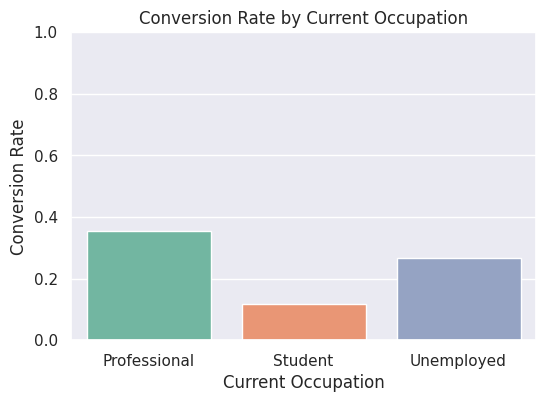

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by current occupation
occupation_conversion = df.groupby("current_occupation")["status"].mean().reset_index()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x="current_occupation", y="status", data=occupation_conversion, palette="Set2")
plt.title("Conversion Rate by Current Occupation")
plt.ylabel("Conversion Rate")
plt.xlabel("Current Occupation")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


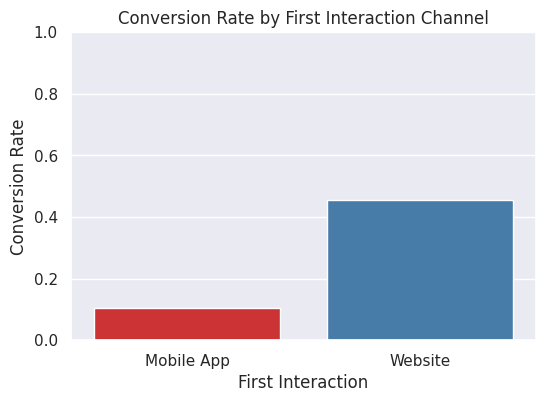

In [ ]:
interaction_conversion = df.groupby("first_interaction")["status"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="first_interaction", y="status", data=interaction_conversion, palette="Set1")
plt.title("Conversion Rate by First Interaction Channel")
plt.ylabel("Conversion Rate")
plt.xlabel("First Interaction")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


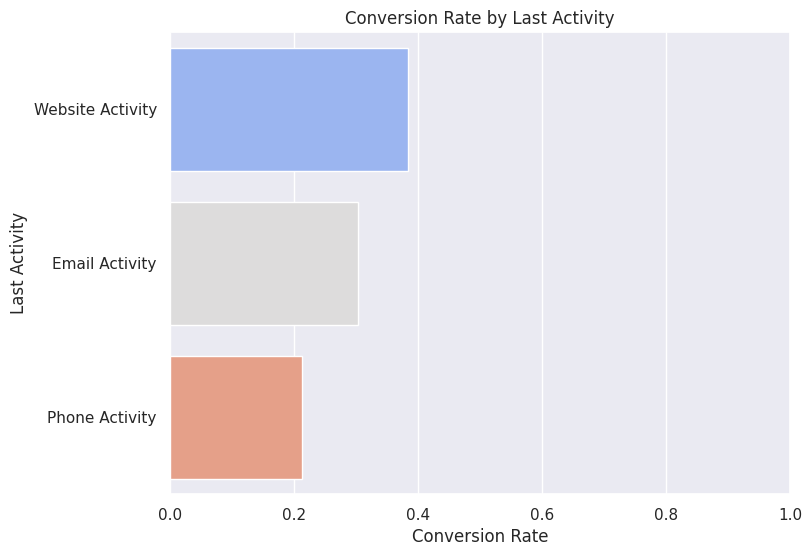

In [ ]:
activity_conversion = df.groupby("last_activity")["status"].mean().reset_index()
activity_conversion = activity_conversion.sort_values("status", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(y="last_activity", x="status", data=activity_conversion, palette="coolwarm")
plt.title("Conversion Rate by Last Activity")
plt.xlabel("Conversion Rate")
plt.ylabel("Last Activity")
plt.xlim(0, 1)
plt.grid(True, axis='x')
plt.show()


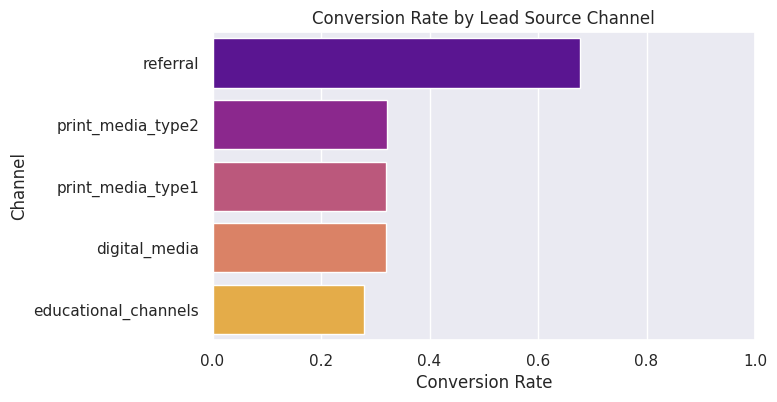

                Channel  Conversion Rate
4              referral            0.677
1     print_media_type2            0.322
0     print_media_type1            0.320
2         digital_media            0.319
3  educational_channels            0.279


In [ ]:
channel_conversion = {}

# Define the channels variable with the relevant column names
channels = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]

for col in channels:
    leads_with_channel = df[df[col] == 'Yes'] # assuming the flags are strings 'Yes'/'No'
    if len(leads_with_channel) > 0:
        conversion_rate = leads_with_channel["status"].mean()
        channel_conversion[col] = round(conversion_rate if not pd.isna(conversion_rate) else 0.0, 3)
    else:
        channel_conversion[col] = 0.0  # No leads had this channel flagged

channel_df = pd.DataFrame(list(channel_conversion.items()), columns=["Channel", "Conversion Rate"])
channel_df.sort_values("Conversion Rate", ascending=False, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.barplot(x="Conversion Rate", y="Channel", data=channel_df, palette="plasma")
plt.title("Conversion Rate by Lead Source Channel")
plt.xlim(0, 1)
plt.grid(True, axis='x')
plt.show()

print(channel_df)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


* `current_occupation1` has 3 unique values.
* `first_interaction` has 2 unique values.
* `profile_completed` has 3 unique values.
* `last_activity` has 3 unique values.
* `print_media_type1` has 2 unique values.
* `print_media_type2` has 2 unique values.
* `digital_media` has 2 unique values.
* `educational_channels` has 2 unique values.
* `referral` has 2 unique values.
* `status` has 2 unique values.
* Other columns such as `age`, `website_visits`, `time_spent_on_website` and `page_views_per_visit` have numerical data.


* The `ID` column has 4162 unique values. It is unique for every row and cannot be used for analysis. Hence we can drop the `ID` column.

In [ ]:
df=data.copy()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.columns

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
cols=['age', 'current_occupation', 'first_interaction','profile_completed', 'website_visits', 'time_spent_on_website','page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels','referral', 'status']
for col in cols:
  print(df[col].value_counts())

age
57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
54     88
51     88
49     87
21     86
23     85
46     85
50     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
35     66
18     66
40     63
37     60
36     58
38     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: count, dtype: int64
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
website_visits
2     1229
1      755
3      641
4      494
5      422
6      282
7      232
0      174
8      151
9       78
10      34
11      29
12      25
13      23
14      17
15       9
24       3
16       3
25       2
20     

# Univariate analysis


### Boxplot and histogram for numerical variables

In [ ]:
#univariate analysis
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

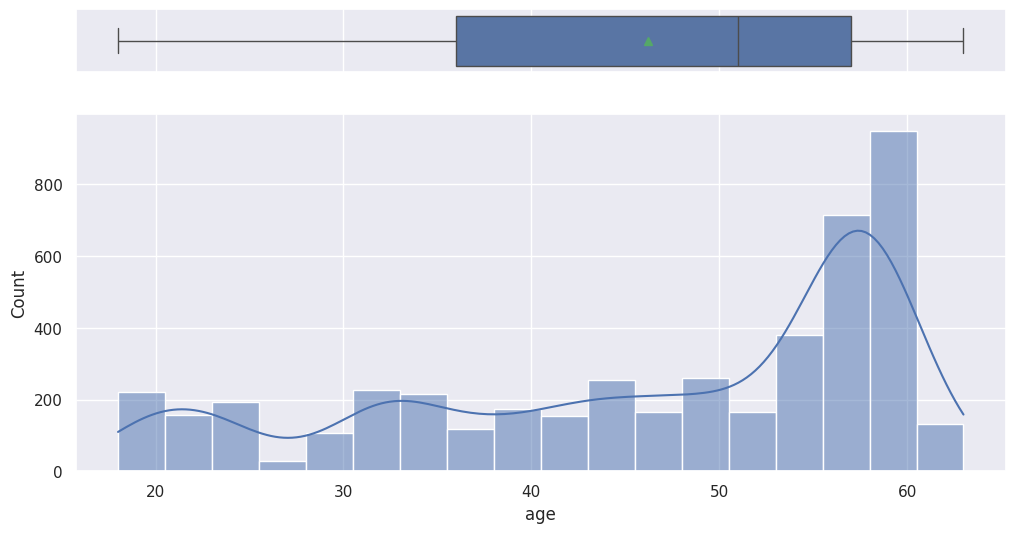

In [ ]:
hist_box(df,'age')

* The `age` column is left-skewed.
* Though all the age groups exist, the count is higher for age groups > 50.
* The boxplot shows that there are no outliers for this column and these values can be efficiently used for bivariate analysis.

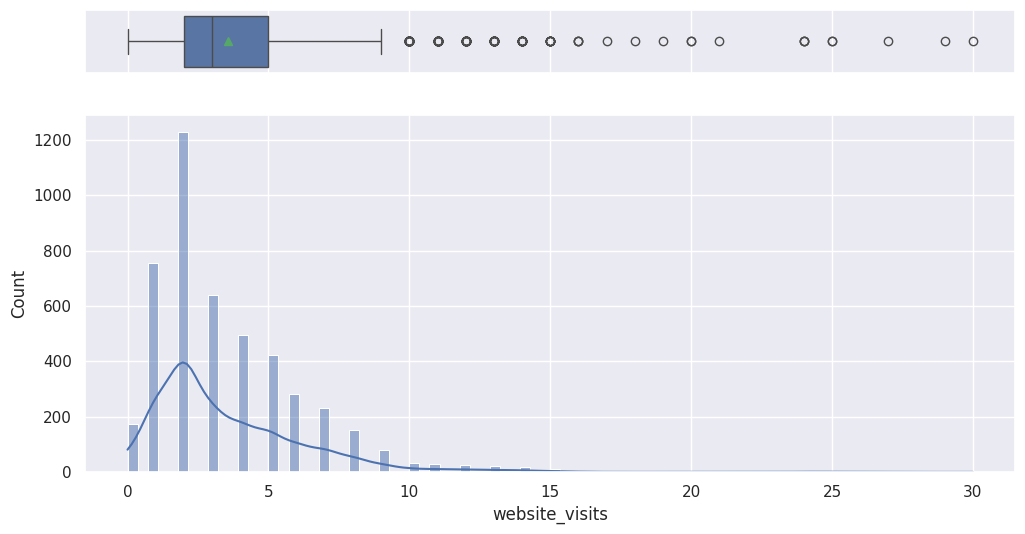

In [ ]:
hist_box(df,'website_visits')

* The above histogram shows that the data is right-skewed.
* Most of the values in this column lie between 0 and 15. Hence the values above 15 (sparse outliers) can be dropped.
* The boxplot indicates that there are multiple outliers towards the right.

In [ ]:
df[df.website_visits>9]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
31,55,Unemployed,Website,Medium,13,1055,1.373,Email Activity,No,No,Yes,Yes,No,1
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
201,57,Professional,Mobile App,High,14,66,2.043,Email Activity,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,59,Unemployed,Mobile App,High,13,30,3.200,Website Activity,No,No,No,Yes,No,0
4571,54,Professional,Website,High,12,1513,5.703,Email Activity,No,No,No,No,No,1
4583,49,Professional,Website,Medium,24,1039,2.064,Email Activity,Yes,No,No,No,No,1
4589,21,Student,Website,High,16,251,2.108,Phone Activity,No,No,No,No,No,0


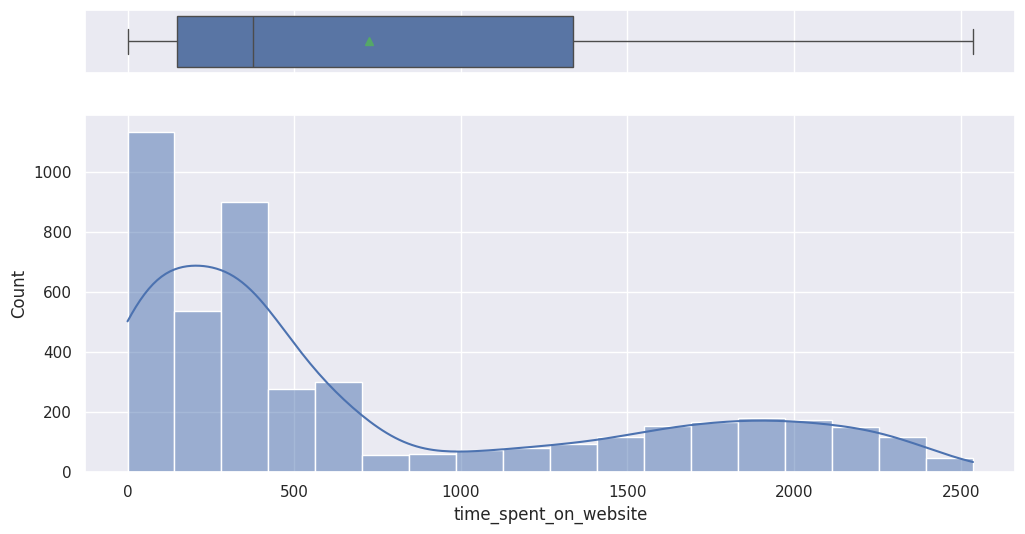

In [ ]:
hist_box(df,'time_spent_on_website')

*  All the values fall in the range of 0-2500. However, the distribution is right-skewed.
* There are no outliers in `time_spent_on_website`.

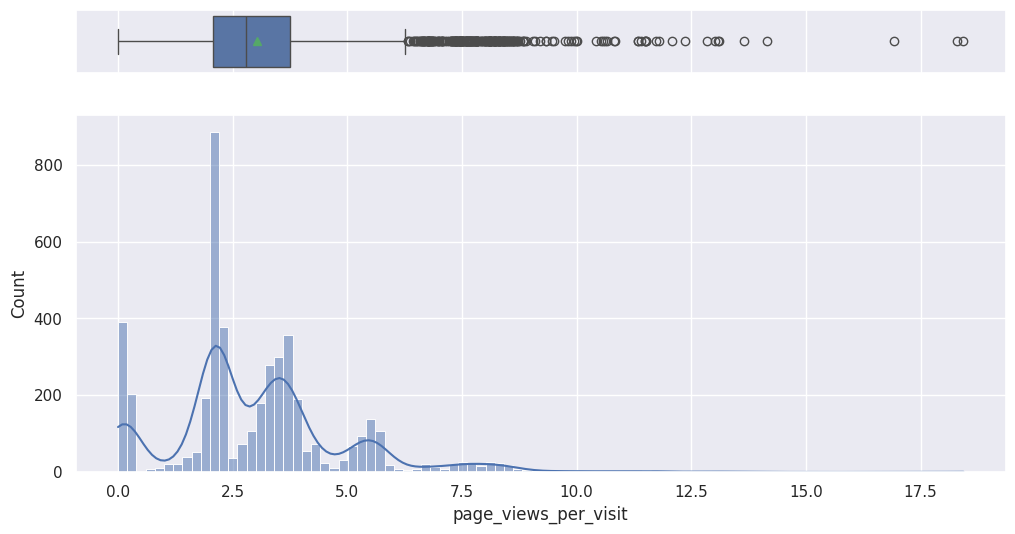

In [ ]:
hist_box(df,'page_views_per_visit')

* `page_views_per_visit` has huge number of outliers. Removing all the outliers would decrease the efficiency of the model.
* Therefore we look for a threshold value where any value for page_views_per_visit is not realistic in real life.
* 10 can be considered value as any value above it is not realistic and all the outliers above it are sparse.
* We can drop all the rows where the value of page_views_per_visit > 10.

In [ ]:
print(df[df["page_views_per_visit"] > 10].shape)
print(df[df["website_visits"] > 15].shape)

(27, 14)
(17, 14)


* There are 27 rows out of 4612 rows where page_views_per_visit > 10.
* There are 17 rows where website_visits > 15.

## Dropping all the rows with outliers

In [ ]:
df.drop(df[df["page_views_per_visit"] > 10].index, inplace=True)
df.drop(df[df["website_visits"] > 15].index, inplace=True)

In [ ]:
df.shape

(4568, 14)

* There are 4568 rows left after dropping the outliers.

### Bar graphs for categorical variables

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Current Occupation**

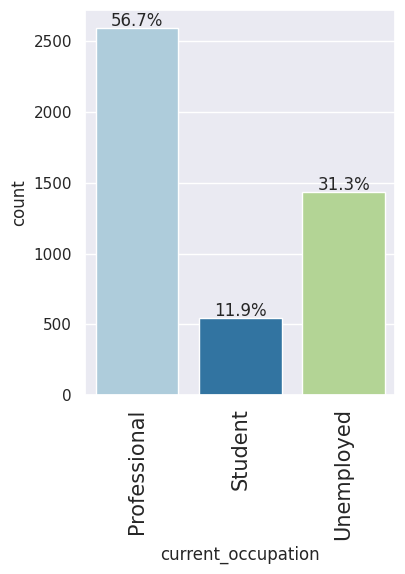

In [ ]:
labeled_barplot(df, "current_occupation", perc=True)

In [ ]:
df['current_occupation'].value_counts(normalize=True)

,proportion
current_occupation,
Professional,0.567426
Unemployed,0.313485
Student,0.119089


* According to the above bar graph, 56.7% of the people are working professionals, 11.9% of them are students and the remaining are unemployed.
* It can also be possible that the working professionals are more likely to be converted into paid customers due to their stable income source.

**First Interaction**

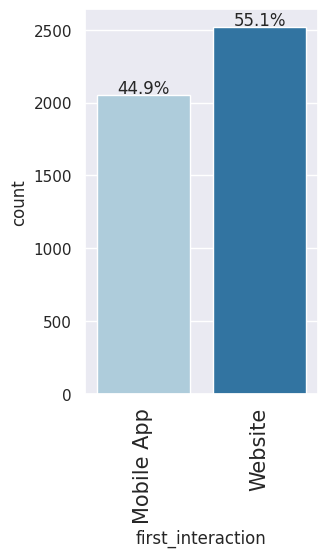

In [ ]:
labeled_barplot(df, "first_interaction", perc=True)

In [ ]:
df['first_interaction'].value_counts(normalize=True)

,proportion
first_interaction,
Website,0.550569
Mobile App,0.449431


* Majority of the people use the website to access the resources. this might be due to the easy accessibility of websites.

**Profile Completed**

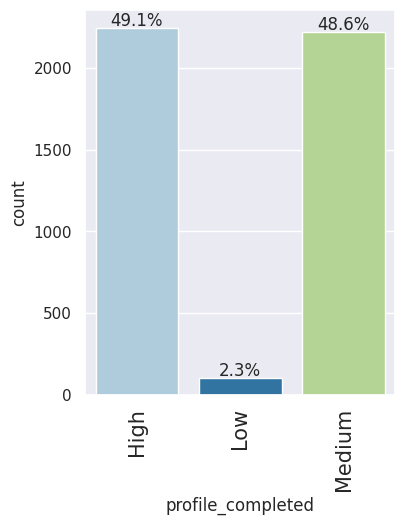

In [ ]:
labeled_barplot(df, "profile_completed", perc=True)

In [ ]:
df['profile_completed'].value_counts(normalize=True)

,proportion
profile_completed,
High,0.491243
Medium,0.485771
Low,0.022986


* 49.1% of the users are almost done with updating their profile with the necessary details.
* 48.6% of the users are done with completing 50-75% of thier profile. This value is close to the percentage of "high".
* Very less percentage (2.3%) of the users haven't completed their profile (0-50% of the profile). This column can be ignored based on further bivariate analysis.

In [ ]:
df[df["profile_completed"] == "Low"].shape

(105, 14)

* There are only 105 rows in the entire dataset where `profile_completed` = "Low".

In [ ]:
df[(df.profile_completed == "Low") & (df.status == 1)].shape

(8, 14)

* Out of those 105 users, only 8 users converted to paid customers (`status` = 1).

**Last Activity**

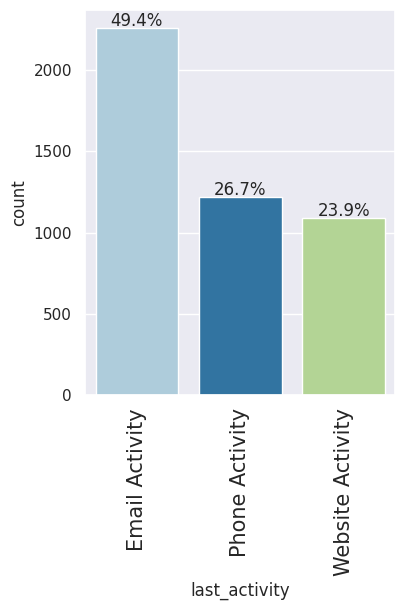

In [ ]:
labeled_barplot(df, "last_activity", perc=True)

In [ ]:
df['last_activity'].value_counts(normalize=True)

,proportion
last_activity,
Email Activity,0.494089
Phone Activity,0.267294
Website Activity,0.238616


* All the unique values of `last_activity` are balanced.
* Every unique value has equal importance and cannot be neglected.

**Print Media Type 1**

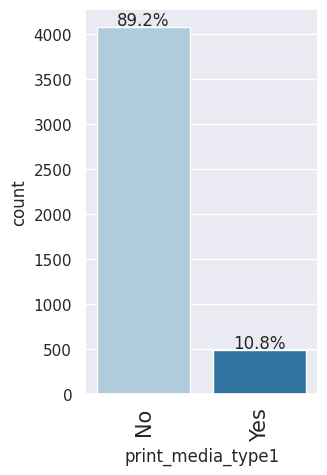

In [ ]:
labeled_barplot(df, "print_media_type1", perc=True)

In [ ]:
df['print_media_type1'].value_counts(normalize=True)

,proportion
print_media_type1,
No,0.892075
Yes,0.107925


* There are only 2 values in 1print_media_type1`.
* Even though the number of values equal to "yes" is comparitively less (10%), it cannot be neglected without further analysis.

**Print Media Type 2**

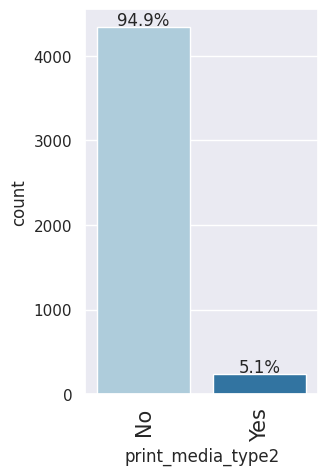

In [ ]:
labeled_barplot(df, "print_media_type2", perc=True)

In [ ]:
df['print_media_type1'].value_counts(normalize=True)

,proportion
print_media_type1,
No,0.892075
Yes,0.107925


* There are only 2 values in 1print_media_type2`.
* Even though the number of values equal to "yes" is comparitively less (5.1%), it cannot be neglected without further analysis.

**Digital Media**

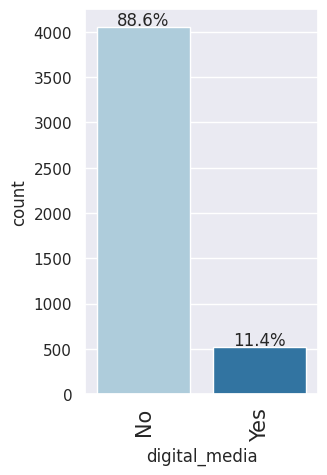

In [ ]:
labeled_barplot(df, "digital_media", perc=True)

In [ ]:
df['digital_media'].value_counts(normalize=True)

,proportion
digital_media,
No,0.886165
Yes,0.113835


* There are only 2 values in `digital_media`.
* Even though the number of values equal to "yes" is comparitively less (11.4%), it cannot be neglected without further analysis.

**Education Channels**

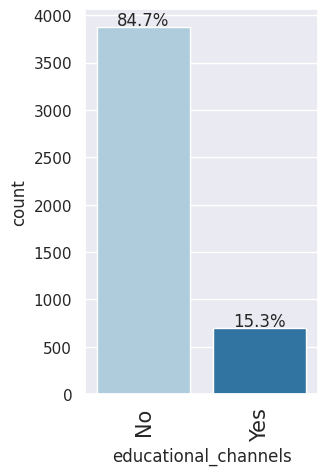

In [ ]:
labeled_barplot(df, "educational_channels", perc=True)

In [ ]:
df['educational_channels'].value_counts(normalize=True)

,proportion
educational_channels,
No,0.847417
Yes,0.152583


* Higher percentage for "no" in `educational_channels` indicates that most of the user have heard about ExtraaLearn from other platforms which are not education related.

**Referral**

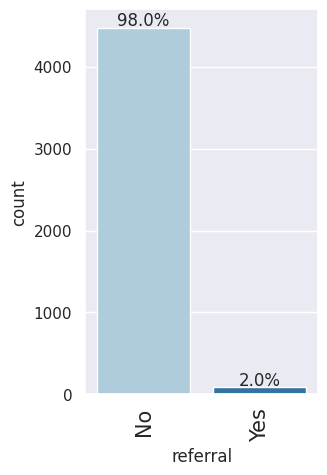

In [ ]:
labeled_barplot(df, "referral", perc=True)

In [ ]:
df['referral'].value_counts(normalize=True)

,proportion
referral,
No,0.97986
Yes,0.02014


* Negligible percentage of "yes" in `referral` (2%) suggests that very less number of people got to know about ExtraaLearn via a referral.

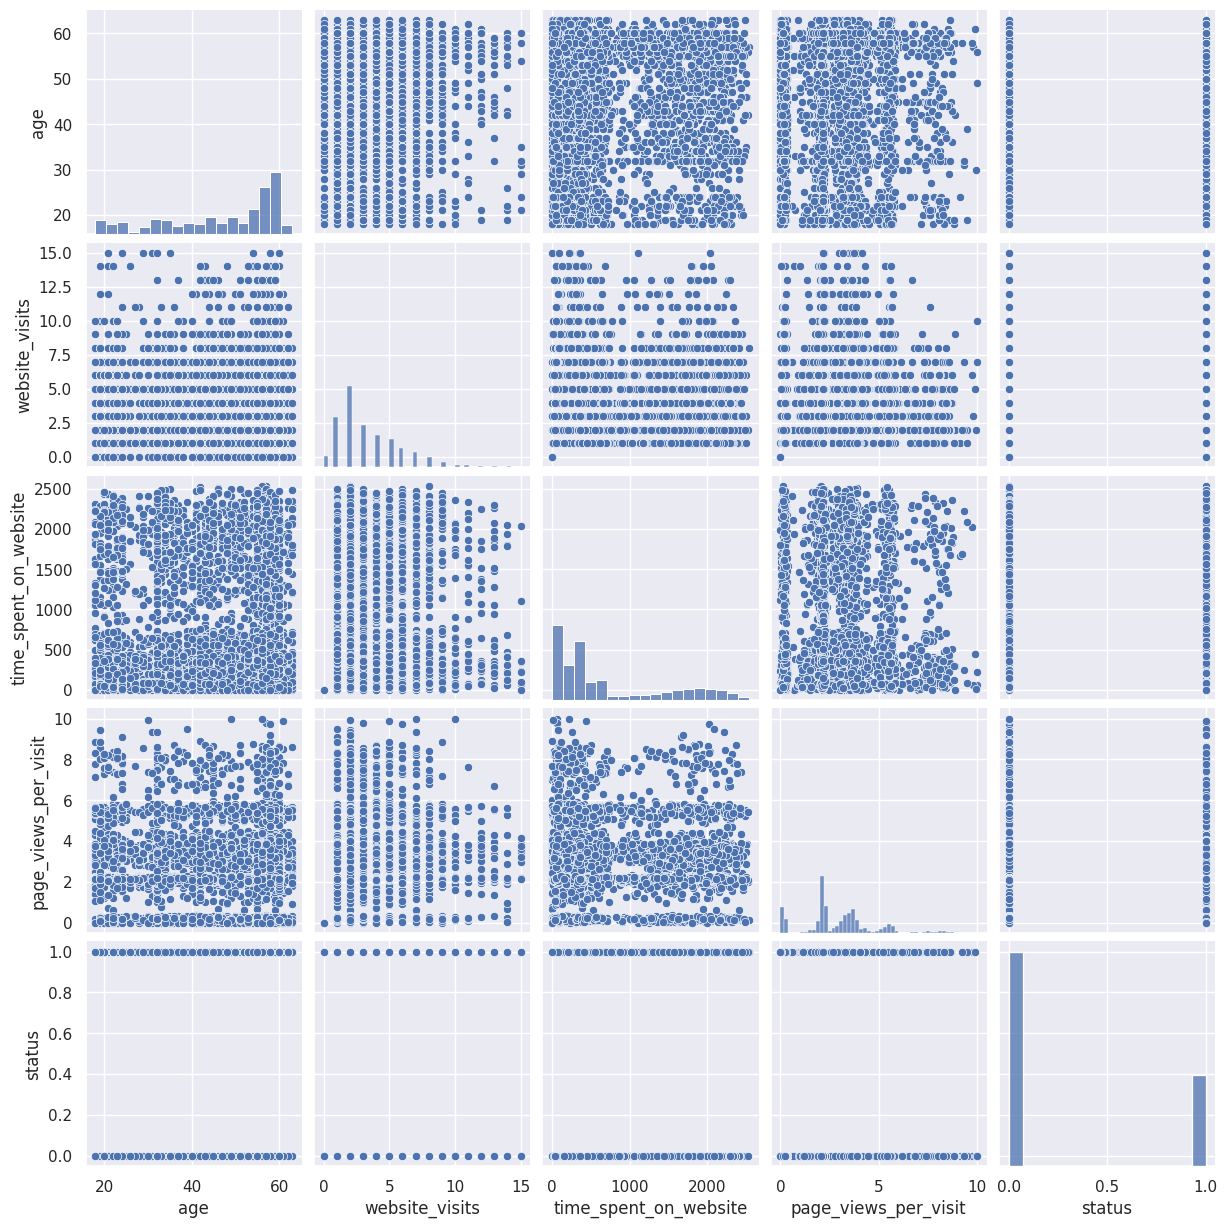

In [ ]:
sns.pairplot(df)
plt.show()

#### Answers for questions mentioned above

1. The bar plot showing "Conversion Rate by Current Occupation" suggests that the course offerings are more aligned with the needs and goals of professionals and those who are unemployed compared to students.
2. The bar plot showing "Conversion Rate by First Interaction Channel" clearly shows that leads who first interacted through the Website have a significantly higher conversion rate than those who first interacted through the Mobile App.
3. The bar plot showing "Conversion Rate by Last Activity" indicates that Website Activity has the highest conversion rate, followed by Email Activity, and then Phone Activity.
4. The bar plot and the DataFrame showing "Conversion Rate by Lead Source Channel" reveal that Referral has the highest conversion rate by a significant margin (0.677), followed by print media type 2 (0.322), print media type 1 (0.320), digital media (0.319), and finally educational channels (0.279).
5. Yes, based on the "Conversion Rate by Profile Completion Status" plot and table, leads with High profile completion have a significantly higher conversion rate (0.418) compared to those with Medium (0.189) and Low (0.075) profile completion.

### Bivariate Analysis

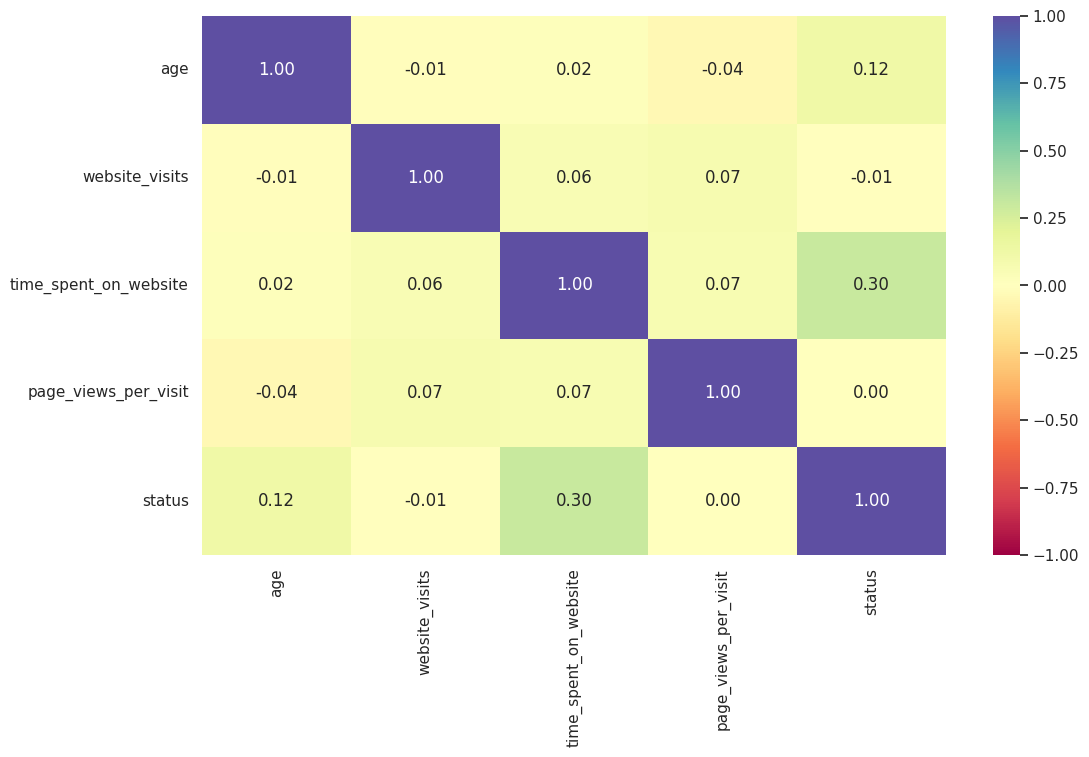

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Inferences -
Time spent on website,age is positively impacting the status of conversion

website visits ,page_views_per visit are not impacting status directly


**Creating functions that will help us with further analysis.**

status directly proportional to age and time spent on website


In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


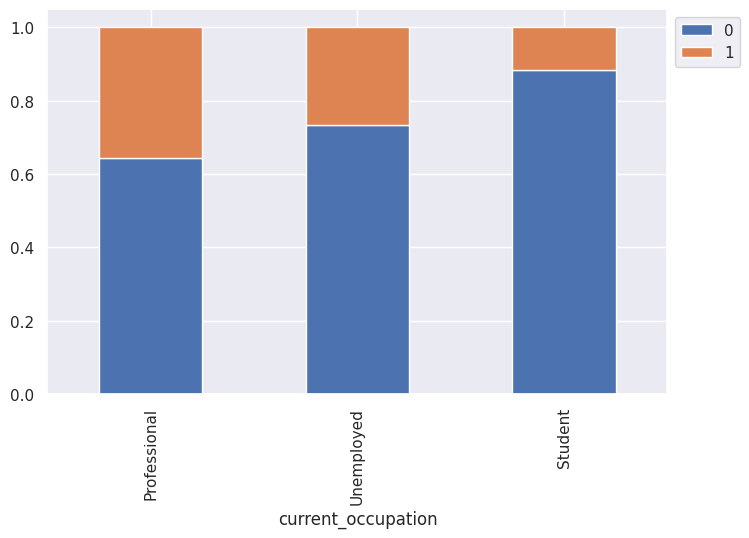

In [ ]:
stacked_barplot(data, "current_occupation", "status")

professionals are likely to convert , student dataset is very low indicating less preference by the student

**Age can be a good factor to differentiate between such leads**

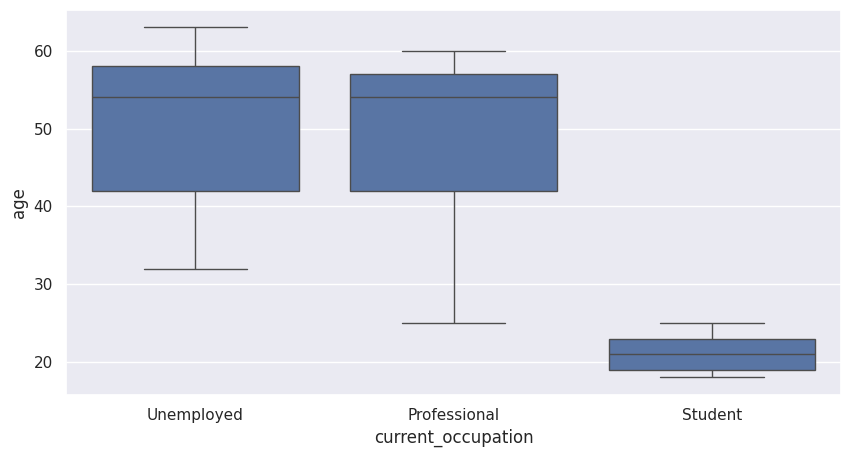

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

age to student  - age to proffesionals/unemployed
infernce - Age of user

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


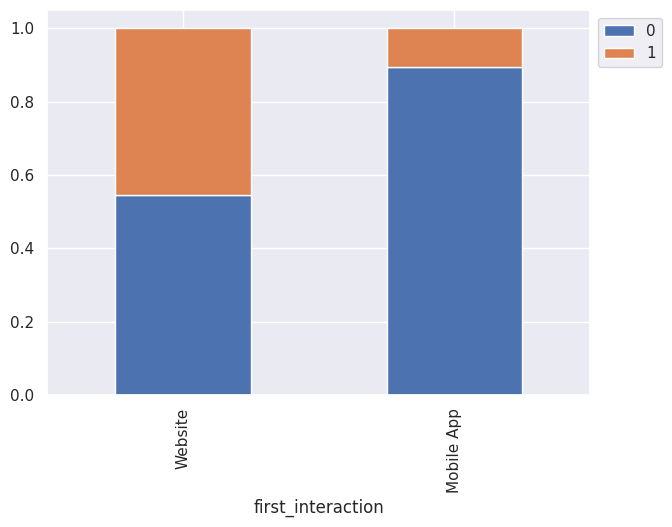

In [ ]:
stacked_barplot(data ,"first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

People utilizing the website are more likely to convert

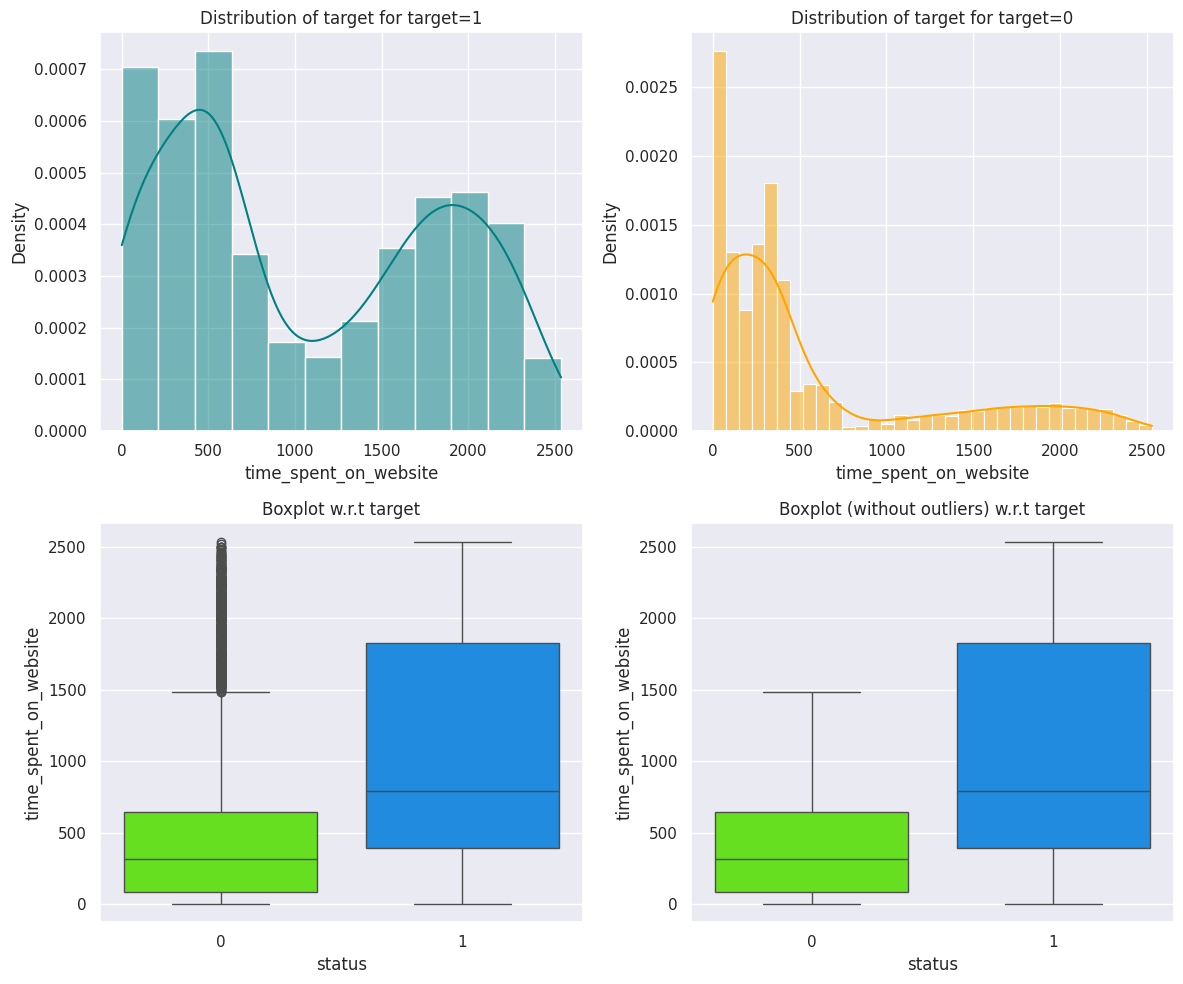

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

inference - users who have converted show random pattern among the range (time spent on website , which makes it crucial to retain the information across such wide span despite data distribution skewed to the right)

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

,time_spent_on_website
status,
0,317.0
1,789.0


**Let's do a similar analysis for time spent on website and page views per visit.**

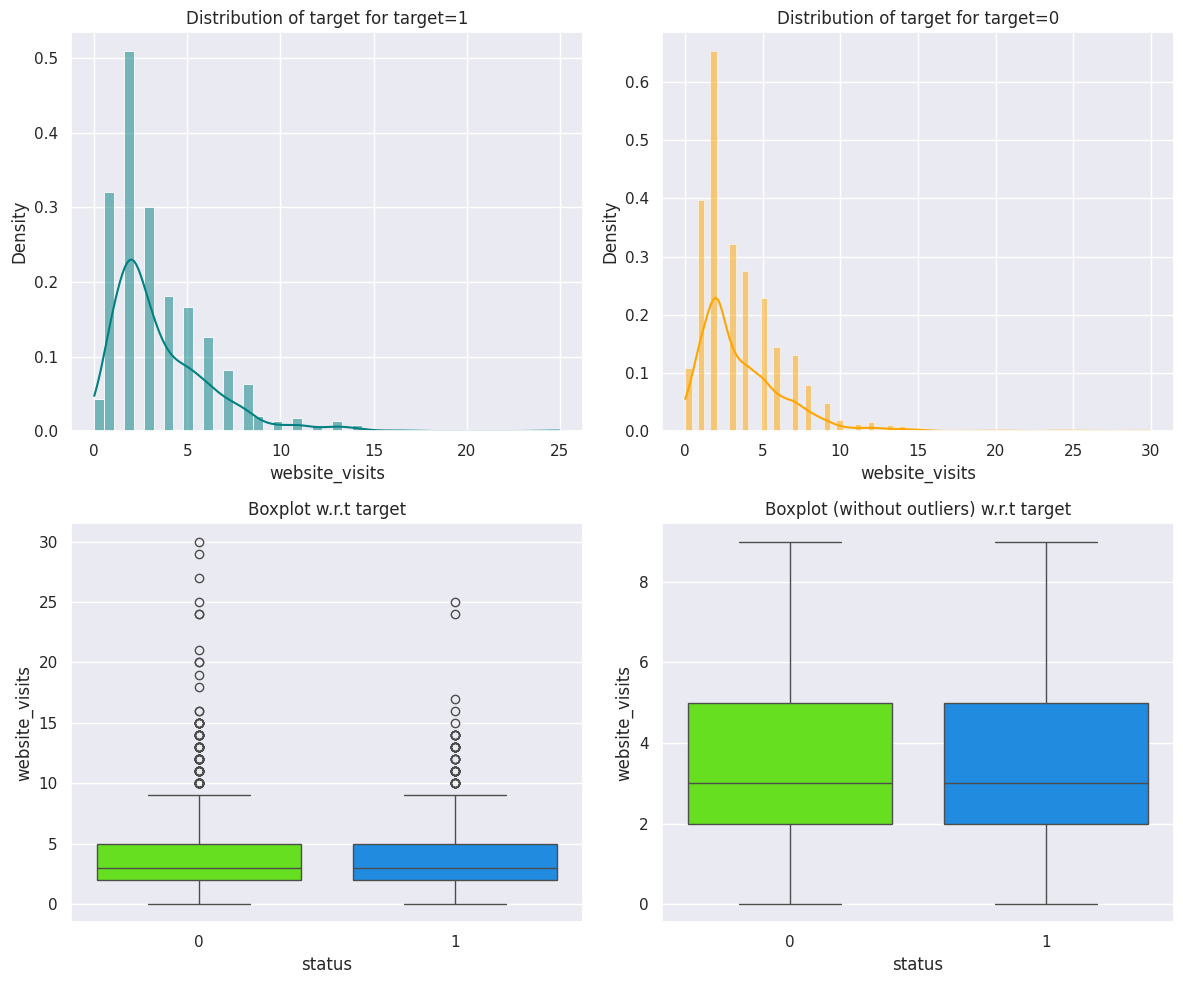

In [ ]:
distribution_plot_wrt_target(data,"website_visits","status") # Complete the code to plot distribution for website_visits and status

Users of both groups(converted and not converted) show a similar pattern /distribution in terms of website_visits

Inference - The distribution doesnt reveal any new or useful pattern for status conversion , would benifit from removal of outliers

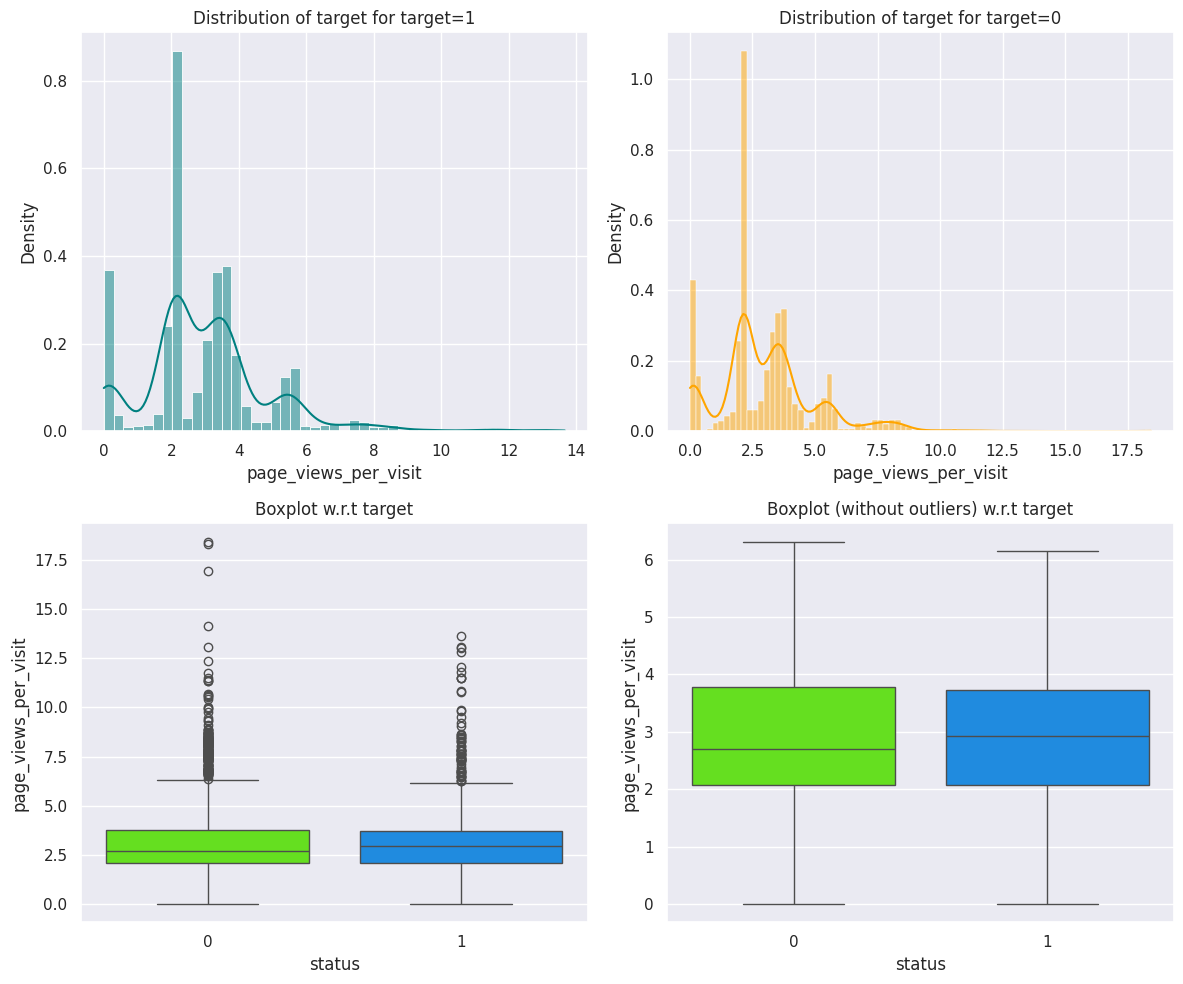

In [ ]:
distribution_plot_wrt_target(data,"page_views_per_visit","status") # Complete the code to plot distribution for page_views_per_visit and status

Similar to previous case -

Removing outliers would be benificial.Along with that the data distribution is very similar between status of 1 or 0 idicating that page_views_per_visit would explain about users as a whole

Another Inference - as many people prefer to view lower amount of pages per visit , Improving the first /landing pages could benifit the user experience

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


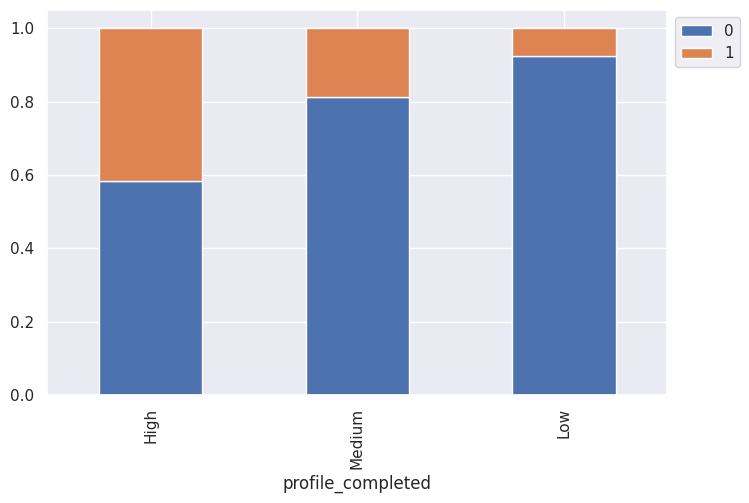

In [ ]:
stacked_barplot(data,"profile_completed","status")  # Complete the code to plot stacked_barplot for profile_completed and status

Inference - Users whose completion is high tend to convert , spending more focus on connection with such people could lead to higher conversion rate

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


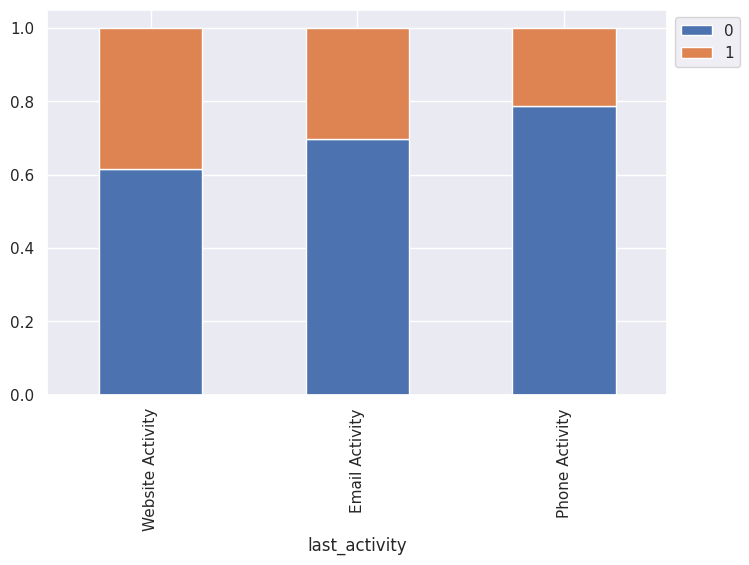

In [ ]:
stacked_barplot(data,"last_activity","status") # Complete the code to plot stacked_barplot for last_activity and status

Most users comparitively have their last activity in Email , but there is higher conversion rate having website as their last activity

Inference - Focusing on website activities rather than phone call, Email would likely create positive outcome

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


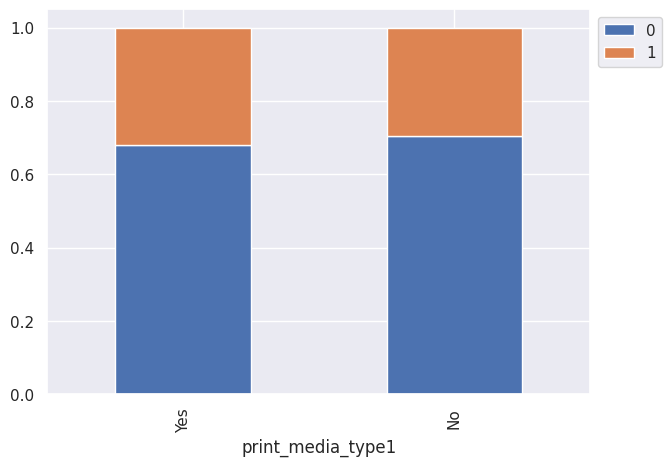

In [ ]:
stacked_barplot(data,"print_media_type1","status") # Complete the code to plot stacked_barplot for print_media_type1 and status

There is not much difference between the categories in terms of % , most people are unaware or didnot come to know through news

Inference - There is a minute increase in conversion rate  to users who got to know through News in regards to % , More data is needed to deduce the impact made

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


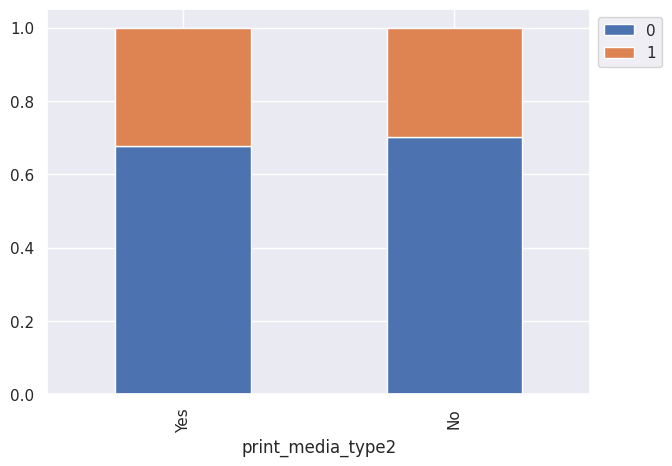

In [ ]:
stacked_barplot(data,"print_media_type2","status") # Complete the code to plot stacked_barplot for print_media_type2 and status

Similar to previous case

There is not much difference between the categories in terms of % , most people are unaware or didnot come to know through magazine

Inference - There is a minute increase in conversion rate  to users who got to know through magazine in regards to % , More data is needed to deduce the impact made

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


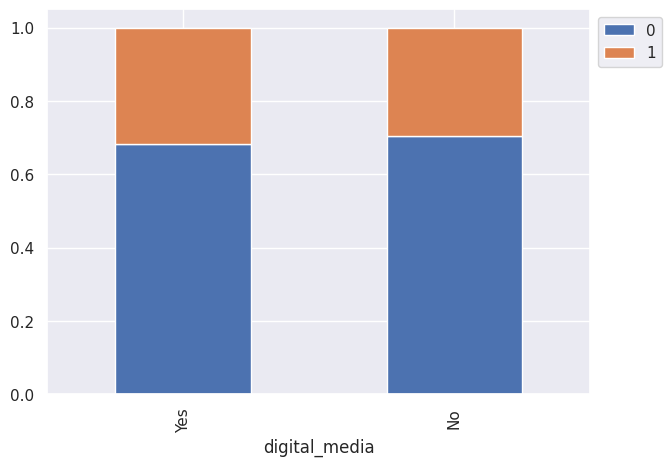

In [ ]:
stacked_barplot(data,"digital_media","status") # Complete the code to plot stacked_barplot for digital_media and status

There is not much difference between the categories in terms of % , most people are unaware or didnot come to know through media

Inference - There is a minute increase in conversion rate  to users who got to know through media in regards to % , More data is needed to deduce the impact made

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


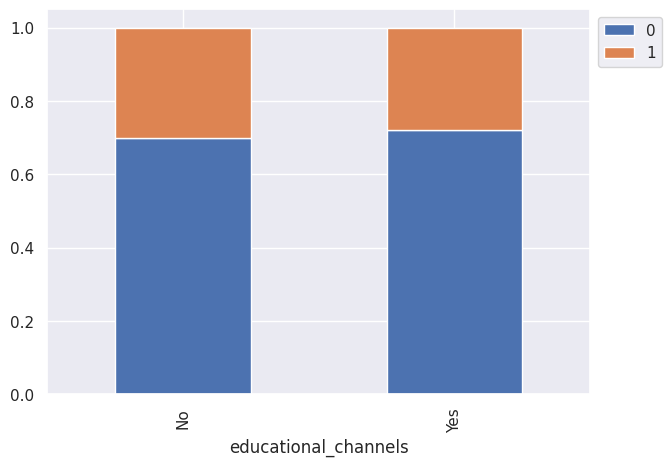

In [ ]:
stacked_barplot(data,"educational_channels","status") # Complete the code to plot stacked_barplot for educational_channels and status

##Overall Inference

Very few % of users got to know about the company through the News, Magazine ,Digital Media , Educational Channels

Although there is a slight increase in conversion rate of users , more data would be useful for inference


##Outreach

Educational Channels being the highest in terms of outreach and Magazines being the lowest

Focus can be kept on educational channels comparitively



status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


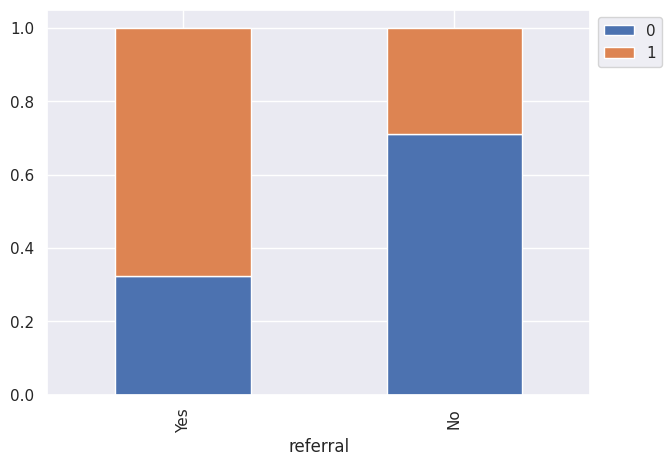

In [ ]:
stacked_barplot(data,"referral","status") # Complete the code to plot stacked_barplot for referral and status

Although No. of users having referral is low ,high % of people have converted

Inference - Improving the refferal count would have a higher chance of increasing conversion



In [ ]:
df.isna().sum()

,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0
print_media_type2,0


In [ ]:
# Cap outliers in website_visits and page_views_per_visit at the 95th percentile
for col in ['website_visits', 'page_views_per_visit']:
    cap_value = df[col].quantile(0.95)
    df[col] = np.where(df[col] > cap_value, cap_value, df[col])

print("Outliers capped in website_visits and page_views_per_visit")

Outliers capped in website_visits and page_views_per_visit


In [ ]:
# Convert categorical columns to 'category' dtype
cat_col=["current_occupation","first_interaction","profile_completed","last_activity","print_media_type1","print_media_type2","digital_media","educational_channels", "referral"]
for column in cat_col:
    df[column]=df[column].astype('category')

# Encoding categorical varaibles using one-hot encoding
X = df.drop('status', axis=1)
y = df['status']

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=cat_col, drop_first=True)

display(X.head())

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7.0,1639,1.861,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2.0,83,0.320,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3.0,330,0.074,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4.0,464,2.057,False,True,True,False,False,False,True,False,False,False,False,False
5,50,4.0,212,5.682,False,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3197, 16)
Shape of X_test: (1371, 16)
Shape of y_train: (3197,)
Shape of y_test: (1371,)


## Logistic Regression


In [ ]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the Decision Tree model on the training set
print("Logistic Regression Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

Logistic Regression Model Evaluation (Training Set):
Accuracy: 0.8179543321864248

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2251
           1       0.73      0.62      0.67       946

    accuracy                           0.82      3197
   macro avg       0.79      0.76      0.77      3197
weighted avg       0.81      0.82      0.81      3197


Confusion Matrix:
 [[2032  219]
 [ 363  583]]


In [ ]:
y_pred_test = lg.predict(X_test)
print("Logistic Regression Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Logistic Regression Model Evaluation (Testing Set):
Accuracy: 0.8147337709700948

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       955
           1       0.73      0.62      0.67       416

    accuracy                           0.81      1371
   macro avg       0.79      0.76      0.77      1371
weighted avg       0.81      0.81      0.81      1371


Confusion Matrix:
 [[859  96]
 [158 258]]


- The Logistic Regression model performs similarly on both the training and testing sets, indicating good generalization and no significant overfitting.
- The model is better at predicting leads who will not convert (class 0) than those who will convert (class 1), as shown by the higher recall and f1-score for class 0.
- The recall for the positive class (class 1) is relatively low (0.62). This means the model is missing about 38% of the leads who actually convert. Depending on the business objective, improving the identification of positive leads (increasing recall for class 1) might be important, even if it means slightly lower precision.
- The confusion matrix clearly shows the number of correct and incorrect predictions for both classes, highlighting the trade-off between identifying true positives and minimizing false positives.


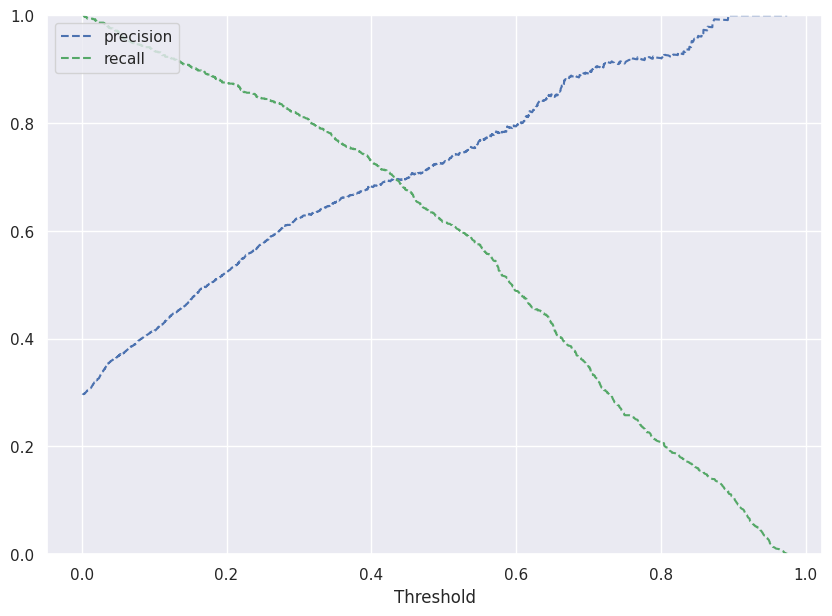

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

from sklearn.metrics import precision_recall_curve
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
# Setting the optimal threshold
optimal_threshold = 0.43

In [ ]:
# creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
print("Logistic Regression Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train[:,1]>optimal_threshold))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train[:,1]>optimal_threshold))

Logistic Regression Model Evaluation (Training Set):
Accuracy: 0.8201438848920863

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2251
           1       0.69      0.70      0.70       946

    accuracy                           0.82      3197
   macro avg       0.78      0.79      0.78      3197
weighted avg       0.82      0.82      0.82      3197



In [ ]:
y_pred_test=lg.predict_proba(X_test)
print("Logistic Regression Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_test[:,1]>optimal_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test[:,1]>optimal_threshold))

Logistic Regression Model Evaluation (Testing Set):
Accuracy: 0.8096280087527352

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       955
           1       0.69      0.68      0.69       416

    accuracy                           0.81      1371
   macro avg       0.77      0.77      0.77      1371
weighted avg       0.81      0.81      0.81      1371



Adjusting the threshold for the Logistic Regression model to 0.43 has improved its ability to identify potential conversions (increased recall for class 1) while maintaining a similar level of precision. This threshold offers a better balance between recall and precision for identifying converting leads compared to the default, making the model more effective for prioritizing leads

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [ ]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)
print("SVM Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train_svm))

SVM Model Evaluation (Training Set):
Accuracy: 0.8273381294964028

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2251
           1       0.72      0.68      0.70       946

    accuracy                           0.83      3197
   macro avg       0.79      0.78      0.79      3197
weighted avg       0.82      0.83      0.83      3197


Confusion Matrix:
 [[2005  246]
 [ 306  640]]


In [ ]:
print("Testing performance:")
y_pred_test_svm = model.predict(X_test_scaled)
print("SVM Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test_svm))

Testing performance:
SVM Model Evaluation (Testing Set):
Accuracy: 0.8154631655725748

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       955
           1       0.71      0.67      0.69       416

    accuracy                           0.82      1371
   macro avg       0.78      0.78      0.78      1371
weighted avg       0.81      0.82      0.81      1371


Confusion Matrix:
 [[838 117]
 [136 280]]


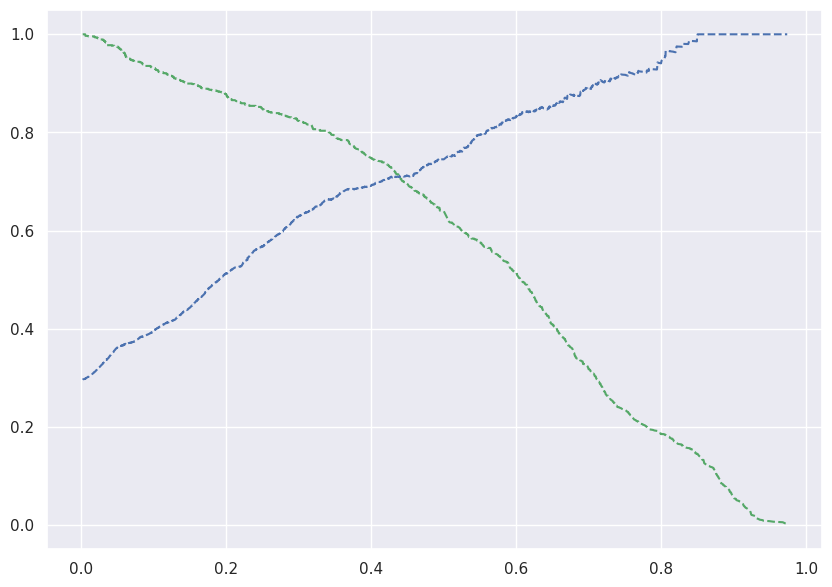

In [ ]:
#precision recall curve for svm
y_scores_svm=model.predict_proba(X_train_scaled)

from sklearn.metrics import precision_recall_curve
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])
#graph
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')

In [ ]:
optimal_threshold = 0.4

In [ ]:
#predicting based on optimal threshold
y_pred_train_svm = model.predict_proba(X_train_scaled)
print("SVM Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm[:,1]>optimal_threshold))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train_svm[:,1]>optimal_threshold))

SVM Model Evaluation (Training Set):
Accuracy: 0.826712543009071

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      2251
           1       0.69      0.75      0.72       946

    accuracy                           0.83      3197
   macro avg       0.79      0.80      0.80      3197
weighted avg       0.83      0.83      0.83      3197



In [ ]:
#predicting for testing dataset
y_pred_test_svm = model.predict_proba(X_test_scaled)
print("SVM Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm[:,1]>optimal_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_svm[:,1]>optimal_threshold))

SVM Model Evaluation (Testing Set):
Accuracy: 0.8205689277899344

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       955
           1       0.69      0.74      0.72       416

    accuracy                           0.82      1371
   macro avg       0.79      0.80      0.79      1371
weighted avg       0.83      0.82      0.82      1371



- Adjusting the threshold for the SVM model to 0.4 has successfully increased the model's ability to identify potential conversions (improved recall for class 1) at a reasonable cost to precision.
- This threshold provides a better balance for identifying converting leads compared to the default threshold, making the model potentially more useful for prioritizing leads in business context.
- The model at threshold 0.3 or below is making precision to fall below 60% so 0.4 would be better to balance it.

## Building a Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model on the training set
print("Decision Tree Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

Decision Tree Model Evaluation (Training Set):
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2251
           1       1.00      1.00      1.00       946

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197


Confusion Matrix:
 [[2251    0]
 [   0  946]]


In [ ]:
# Evaluate the Decision Tree model on the testing set
print("Decision Tree Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Evaluation (Testing Set):
Accuracy: 0.8045222465353756

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       955
           1       0.67      0.69      0.68       416

    accuracy                           0.80      1371
   macro avg       0.77      0.77      0.77      1371
weighted avg       0.81      0.80      0.81      1371


Confusion Matrix:
 [[815 140]
 [128 288]]


In [ ]:
# Get the depth of the Decision Tree
print("Depth of the Decision Tree:", dt.get_depth())


Depth of the Decision Tree: 28


## Do we need to prune the tree?

Yes,because it's overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(criterion="gini",max_depth=7, random_state=42)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model on the training set
print("Decision Tree Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

Decision Tree Model Evaluation (Training Set):
Accuracy: 0.8936502971535815

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      2251
           1       0.82      0.83      0.82       946

    accuracy                           0.89      3197
   macro avg       0.87      0.87      0.87      3197
weighted avg       0.89      0.89      0.89      3197


Confusion Matrix:
 [[2076  175]
 [ 165  781]]


In [ ]:
# Evaluate the Decision Tree model on the testing set
print("Decision Tree Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Evaluation (Testing Set):
Accuracy: 0.8504741064916119

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       955
           1       0.76      0.73      0.75       416

    accuracy                           0.85      1371
   macro avg       0.83      0.82      0.82      1371
weighted avg       0.85      0.85      0.85      1371


Confusion Matrix:
 [[861  94]
 [111 305]]


In [ ]:
# Get the depth of the Decision Tree
print("Depth of the Decision Tree:", dt.get_depth())


Depth of the Decision Tree: 7


## Building a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model on the training set
print("Random Forest Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train_rf))

Random Forest Model Evaluation (Training Set):
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2251
           1       1.00      1.00      1.00       946

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197


Confusion Matrix:
 [[2251    0]
 [   0  946]]


In [ ]:
# Evaluate the Decision Tree model on the testing set
print("Random Forest Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Evaluation (Testing Set):
Accuracy: 0.8482859226841721

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       955
           1       0.79      0.69      0.73       416

    accuracy                           0.85      1371
   macro avg       0.83      0.80      0.81      1371
weighted avg       0.85      0.85      0.85      1371


Confusion Matrix:
 [[877  78]
 [130 286]]


In [ ]:

# Get the depth of each tree in the Random Forest
rf_tree_depths = [tree.get_depth() for tree in rf.estimators_]
print("Depth of individual trees in Random Forest:", rf_tree_depths)
print("Maximum depth of trees in Random Forest:", max(rf_tree_depths))
print("Average depth of trees in Random Forest:", sum(rf_tree_depths) / len(rf_tree_depths))

Depth of individual trees in Random Forest: [23, 19, 27, 23, 26, 20, 24, 23, 23, 22, 25, 21, 22, 24, 23, 22, 22, 23, 20, 20, 21, 25, 24, 23, 22, 21, 20, 22, 24, 23, 21, 21, 24, 22, 22, 22, 21, 22, 22, 21, 22, 26, 22, 21, 21, 25, 27, 22, 23, 21, 24, 27, 23, 23, 22, 21, 23, 23, 23, 27, 20, 23, 23, 19, 19, 21, 23, 21, 23, 24, 22, 22, 25, 22, 21, 20, 23, 23, 22, 23, 21, 23, 22, 23, 19, 21, 21, 24, 25, 26, 22, 22, 24, 26, 22, 23, 20, 24, 23, 28]
Maximum depth of trees in Random Forest: 28
Average depth of trees in Random Forest: 22.59


## Do we need to prune the tree?

Yes,since its overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100,max_depth=9, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model on the training set
print("Random Forest Model Evaluation (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("\nClassification Report:\n", classification_report(y_train, y_pred_train_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred_train_rf))

Random Forest Model Evaluation (Training Set):
Accuracy: 0.9089771660932124

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2251
           1       0.86      0.82      0.84       946

    accuracy                           0.91      3197
   macro avg       0.89      0.88      0.89      3197
weighted avg       0.91      0.91      0.91      3197


Confusion Matrix:
 [[2126  125]
 [ 166  780]]


In [ ]:
# Evaluate the Decision Tree model on the testing set
print("Decision Tree Model Evaluation (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Decision Tree Model Evaluation (Testing Set):
Accuracy: 0.8636032093362509

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       955
           1       0.80      0.73      0.77       416

    accuracy                           0.86      1371
   macro avg       0.84      0.83      0.83      1371
weighted avg       0.86      0.86      0.86      1371


Confusion Matrix:
 [[879  76]
 [111 305]]


In [ ]:
# Get the depth of each tree in the Random Forest
rf_tree_depths = [tree.get_depth() for tree in rf.estimators_]
print("Depth of individual trees in Random Forest:", rf_tree_depths)
print("Maximum depth of trees in Random Forest:", max(rf_tree_depths))
print("Average depth of trees in Random Forest:", sum(rf_tree_depths) / len(rf_tree_depths))

Depth of individual trees in Random Forest: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Maximum depth of trees in Random Forest: 9
Average depth of trees in Random Forest: 9.0


## Actionable Insights and Recommendations

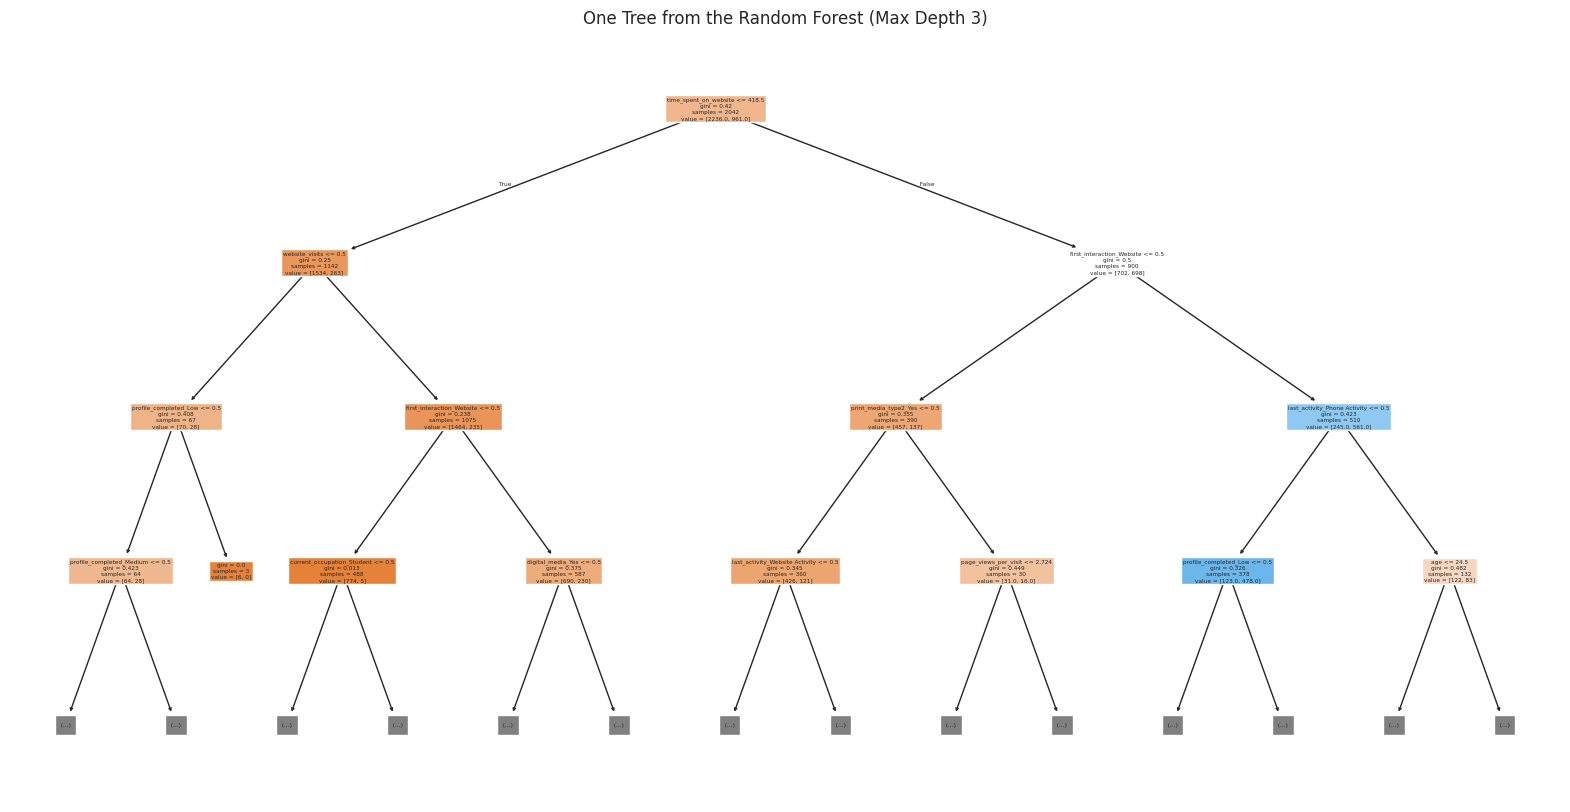

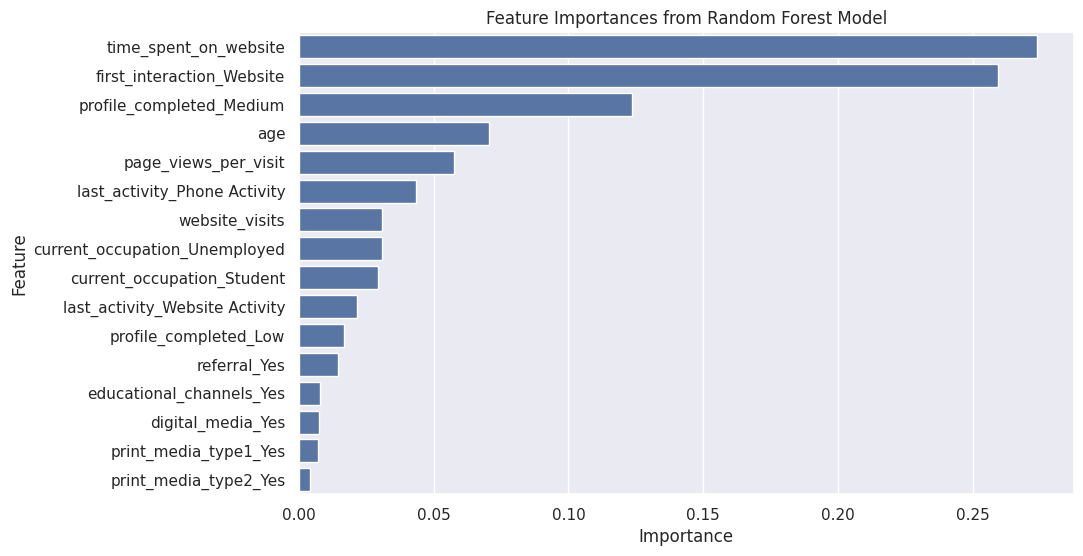

In [ ]:
from sklearn.tree import plot_tree

# Visualize one tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("One Tree from the Random Forest (Max Depth 3)")
plt.show()

# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.tree import export_text

# Print the first tree in the Random Forest in text format
tree_text = export_text(rf.estimators_[0], feature_names=list(X_train.columns))
print(tree_text)

|--- time_spent_on_website <= 418.50
|   |--- website_visits <= 0.50
|   |   |--- profile_completed_Low <= 0.50
|   |   |   |--- profile_completed_Medium <= 0.50
|   |   |   |   |--- first_interaction_Website <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- first_interaction_Website >  0.50
|   |   |   |   |   |--- educational_channels_Yes <= 0.50
|   |   |   |   |   |   |--- current_occupation_Student <= 0.50
|   |   |   |   |   |   |   |--- age <= 59.50
|   |   |   |   |   |   |   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- last_activity_Phone Activity >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- age >  59.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- current_occupation_Student >  0.50
|   |   |   |   |   |   |   |--- digital_media_Yes <= 0.50
|   |   |   |   |   |   |   |   |--- age <= 21.50
|   |

#Inferences from Random Forest

The decision tree provided is part of a Random Forest model designed for lead scoring, predicting whether a user will convert (class 1) or not (class 0) based on features like website behavior, demographics, and marketing channels. Below are key insights derived from analyzing the tree, focusing on factors that influence user conversion:

- **Time Spent on Website is a Key Indicator**:
  - Users spending more than 422.5 seconds on the website are more likely to convert (class 1) in several paths, especially when combined with other factors like non-unemployed status or website-first interactions. High engagement suggests stronger interest or intent.

- **Website Visits Drive Conversion**:
  - Users with more than 0.5 website visits (indicating at least one visit) are more likely to convert, particularly when paired with higher page views or specific demographics (e.g., age <= 27.5 with sufficient time spent). Frequent visits signal active engagement.

- **Referrals Boost Conversion Likelihood**:
  - Users with `referral_Yes > 0.50` (i.e., referred by another user) frequently lead to class 1 predictions. For example, paths like `time_spent_on_website <= 422.50` → `website_visits <= 0.50` → `referral_Yes > 0.50` → `current_occupation_Unemployed <= 0.50` → `class: 1.0` highlight referrals as a strong positive signal.

- **Profile Completion Impacts Conversion**:
  - Users with a medium or high profile completion (`profile_completed_Medium > 0.50`) are less likely to convert in some low-engagement scenarios (e.g., `time_spent_on_website <= 422.50` → `website_visits <= 0.50` → `profile_completed_Medium > 0.50` → `class: 0.0`), but low completion often correlates with non-conversion. This suggests partial engagement without full commitment reduces conversion probability.

- **Age Influences Conversion Patterns**:
  - Younger users (e.g., `age <= 27.50`) and older users (e.g., `age > 58.50`) show different conversion tendencies. For instance, younger users with high page views and website visits may convert, while older users often convert with website-first interactions and high time spent.

- **Occupation Affects Conversion**:
  - Non-unemployed users (`current_occupation_Unemployed <= 0.50`) are more likely to convert in multiple paths, especially with high website engagement. Unemployed users often lead to class 0 unless specific conditions (e.g., high time spent or referrals) are met. Students (`current_occupation_Student > 0.50`) show mixed results, with younger students less likely to convert.

- **Marketing Channels Matter**:
  - Exposure to digital media (`digital_media_Yes > 0.50`) or print media (`print_media_type1_Yes`, `print_media_type2_Yes`) influences conversion. For example, `time_spent_on_website > 422.50` → `current_occupation_Unemployed <= 0.50` → `referral_Yes > 0.50` → `digital_media_Yes > 0.50` → `first_interaction_Website > 0.50` → `class: 1.0` shows digital media and website-first interactions drive conversions.

- **First Interaction via Website is Positive**:
  - Users whose first interaction is via the website (`first_interaction_Website > 0.50`) are more likely to convert, especially with high time spent or referrals. This suggests that direct website engagement is a strong predictor of interest.

- **Last Activity Type Influences Outcome**:
  - Website activity as the last interaction (`last_activity_Website Activity > 0.50`) often leads to class 1, particularly with high engagement metrics. Phone activity (`last_activity_Phone Activity > 0.50`) tends to result in class 0 unless paired with specific conditions like high time spent or website-first interaction.

- **Page Views per Visit as a Secondary Factor**:
  - Higher page views per visit (e.g., `page_views_per_visit > 5.61`) can lead to conversion in younger users with sufficient website visits and time spent, but low page views (e.g., `page_views_per_visit <= 0.10`) often result in non-conversion unless other strong signals (e.g., referrals) are present.

- **Thresholds Highlight Engagement Levels**:
  - Specific thresholds, like `time_spent_on_website > 2290.00` or `page_views_per_visit > 4.82`, indicate high engagement levels that strongly correlate with conversion, particularly for non-unemployed users or those with website-first interactions.

- **Low Engagement Signals Non-Conversion**:
  - Paths with low engagement (e.g., `time_spent_on_website <= 422.50`, `website_visits <= 0.50`, `page_views_per_visit <= 0.10`) consistently lead to class 0, indicating that minimal interaction is a strong predictor of non-conversion.

### Practical Implications
- **Target High-Engagement Users**: Focus marketing efforts on users spending over 422.5 seconds on the website, with multiple visits or high page views, as they are more likely to convert.
- **Leverage Referrals**: Strengthen referral programs, as referred users show a higher conversion rate.
- **Segment by Age and Occupation**: Tailor campaigns to younger users (e.g., <=27.5 years) with high engagement and non-unemployed users, who are more likely to convert.
- **Optimize Website Experience**: Encourage website-first interactions and sustained engagement to boost conversion rates.
- **Re-engage Low-Completion Users**: Users with low profile completion are less likely to convert; targeted prompts to complete profiles could improve outcomes.
- **Refine Marketing Channels**: Invest in digital and print media campaigns, as they positively influence conversion when combined with website engagement.